In [1]:
import numpy as np
import pmcx
from matplotlib import pyplot as plt

In [2]:
pmcx.version()

'v2024.6'

###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

In [3]:
volume = np.ones((100, 100, 100), dtype="uint8")

In [4]:
cfg = {
    "nphoton": 1e7,
    "maxdetphoton": 1e7,
    "vol": volume,
    "tstart":0,
    "tend":5e-9,
    "tstep":5e-9,
    "autopilot": 1,
    "gpuid": 1,
    "prop":[[0,0,1,1],[0.0005,10,0.85,1.36]],
    "bc": "ccrcca001000",
    "isspecular": 1, # should not have effect without 0-voxels
    "srcdir": [0,0,1],
    "srctype": "planar",
    "srcpos": [0, 0, 0],
    "srcparam1": [60, 0, 0, 0], # 3D position of vertex, fourth coordinate is irrelevant
    "srcparam2": [0, 60, 0, 0],
    "issrcfrom0": 1,
    "savedetflag": "dpx",
}

In [5]:
res = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 1e+07
issrcfrom0: 1
autopilot: 1
isspecular: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

Save and plot diffuse reflectance

In [6]:
res.keys()

dict_keys(['detp', 'flux', 'stat'])

In [7]:
#plt.imshow(np.log10(res["dref"][:, :, 0]))
plt.imshow(d_ref)
plt.colorbar()
plt.show()

NameError: name 'd_ref' is not defined

Save and plot pathlength

In [29]:
pmcx.utils.meanpath(res["detp"])

array([58.51356259])

68.80853


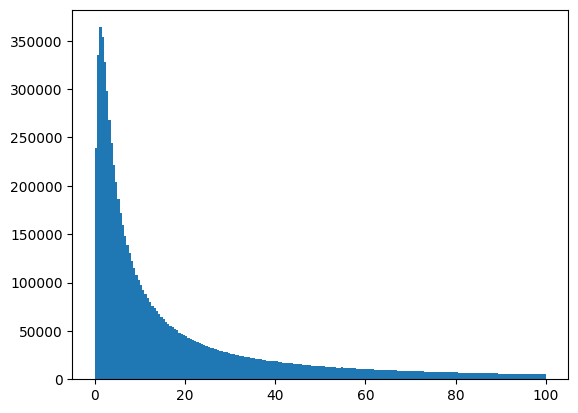

In [ ]:
print(np.mean(res["detp"]["ppath"][:, 0]))
plt.hist(res['detp']['ppath'][:,0], bins=200, range=[0,100]);

In [85]:
pmcx.utils.detweight(res["detp"])

array([0.99991161, 0.99999207, 0.99998212, ..., 0.99977398, 0.99891865,
       0.65858662])

In [ ]:
pmcx.utils.meanpath(res["detp"])

In [88]:
res["detp"]["detid"].shape

(9334702,)

In [90]:
pmcx.utils.cwdref(res["detp"], cfg)

IndexError: index -2 is out of bounds for axis 0 with size 1

Compute Diffuse Reflectance (per Voxel)
- 

In [ ]:
res["detp"]["p"]

59.999992

In [116]:
d_ref = np.zeros(cfg["vol"].shape[:2])

phot_pos = np.floor(res["detp"]["p"][:, :2]).astype(int)

for phot_idx in range(res["detp"]["detid"].shape[0]):
    x,y = phot_pos[phot_idx]
    d_ref[x, y] += detw[phot_idx]

d_ref /= (cfg["nphoton"] / np.prod(cfg["vol"].shape[:2]))

In [112]:
res["detp"]["detid"].shape

(9334702,)

In [105]:
np.prod((1, 2))

2

In [115]:
d_ref.shape

(60, 60)

### Compare diffuse reflectance compute from weights and returned by MCX

In [1]:
import numpy as np
import pmcx
from matplotlib import pyplot as plt

From weights...

In [25]:
volume = np.ones((60, 60, 60), dtype="uint8")

cfg = {
    "nphoton": 1e7,
    "maxdetphoton": 1e7,
    "vol": volume,
    "tstart":0,
    "tend":5e-9,
    "tstep":5e-9,
    "autopilot": 1,
    "gpuid": 1,
    "prop":[[0,0,1,1],[3.6,24,0.85,1.38]],
    "bc": "ccrcca001000",
    #"isspecular": 1, # should not have effect without 0-voxels
    "srcdir": [0,0,1],
    "srctype": "planar",
    "srcpos": [0, 0, 0],
    "srcparam1": [60, 0, 0, 0], # 3D position of vertex, fourth coordinate is irrelevant
    "srcparam2": [0, 60, 0, 0],
    "savedetflag": "dpx",
    "issrcfrom0": 1,
    "isnormalized": 0
}

In [26]:
res = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 1e+07
isnormalized: 0
issrcfrom0: 1
autopilot: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

In [27]:
res.keys()

dict_keys(['detp', 'flux', 'stat'])

In [28]:
photon_weight = pmcx.utils.detweight(res["detp"])


In [6]:
photon_weight = pmcx.utils.detweight(res["detp"])
dref = np.sum(photon_weight) / np.prod(cfg["vol"].shape[:2]) / cfg["nphoton"]
print(dref)

0.00025120287677027944


In [29]:
np.sum(photon_weight) / 1e7

0.9687288668268561

From MCMX output...

In [30]:
cfg["issrcfrom0"] = 0
cfg["vol"][:, :, 0] = 0
cfg["bc"] = "ccrcca" # No longer need detector
cfg["issaveref"] = 1

res = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 1e+07
isnormalized: 0
issrcfrom0: 0
autopilot: 1
issaveref: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io/                 #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

In [31]:
res.keys()

dict_keys(['dref', 'flux', 'stat'])

In [32]:
res["dref"][:, :, 0, 0].shape

(60, 60)

In [32]:
np.sum(res["dref"][:, :, 0, 0]) / cfg["nphoton"] / np.prod(cfg["vol"].shape[:2])

0.0002690730555555556

In [34]:
np.mean(res["dref"][:, :, 0, 0] / cfg["nphoton"] / 1)

0.0002512004

In [33]:
np.sum(res["dref"][:, :, 0, :]) / cfg["nphoton"]

0.968663

**-> Use isnormalized = 0 (or 2)**

In [36]:
dref2 / dref

19.99980280717233